<div style="line-height:0.5">
<h1 style="color:slateblue "> Matplotlib trials 4 </h1>
</div>
<div style="line-height:1.5">
<div style="margin-top: -14px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> Colormaps + 3D Plots + Streamplots + plot images + amimations
</span>
</div>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl

from matplotlib import animation
from matplotlib import pyplot as plt
from matplotlib.animation import PillowWriter

from colorspacious import cspace_converter

from IPython.display import display, clear_output
import time

#from mpl_toolkits.mplot3d import Axes3D
#import numpy as np
#import matplotlib.animation as animation

In [11]:
plt.style.use(['default'])
_ = np.linspace(-1, 1, 100)
x, y = np.meshgrid(_,_)
z = x**2+x*y

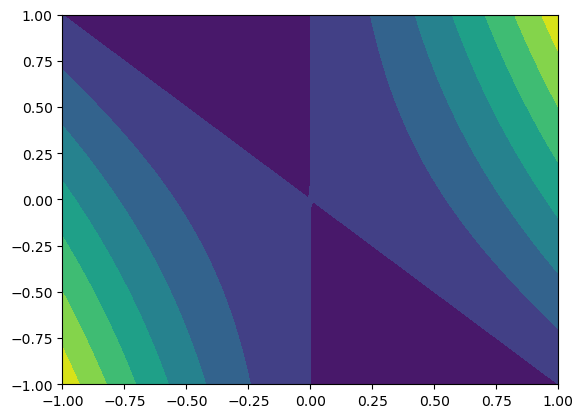

In [12]:
plt.contourf(x,y,z)
plt.show()

## Classes of colormaps
+ Sequential    
+ Diverging     
+ Cyclic    
+ Qualitative    

In [13]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

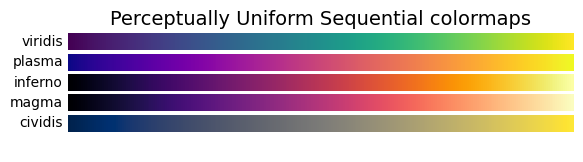

In [14]:
plot_color_gradients('Perceptually Uniform Sequential',
                    ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

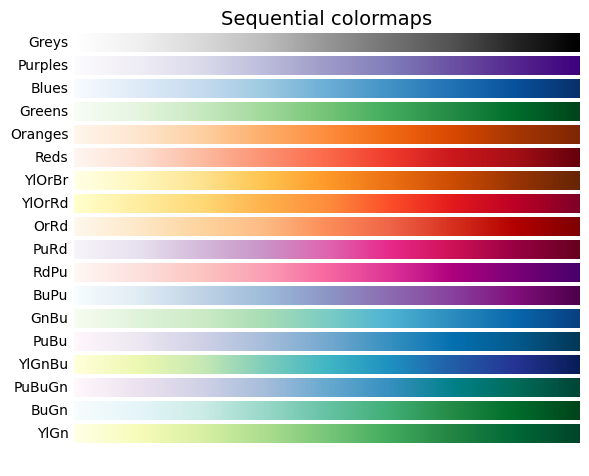

In [15]:
plot_color_gradients('Sequential',
                    ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                    'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                    'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])

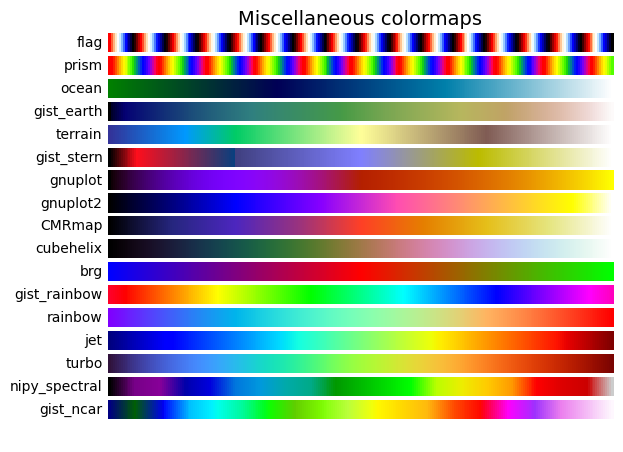

In [18]:
plot_color_gradients('Miscellaneous',
                    ['flag', 'prism', 'ocean', 'gist_earth', 'terrain',
                    'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
                    'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet',
                    'turbo', 'nipy_spectral', 'gist_ncar'])

plt.show()

Text(0, 0.5, 'Vertical Position [m]')

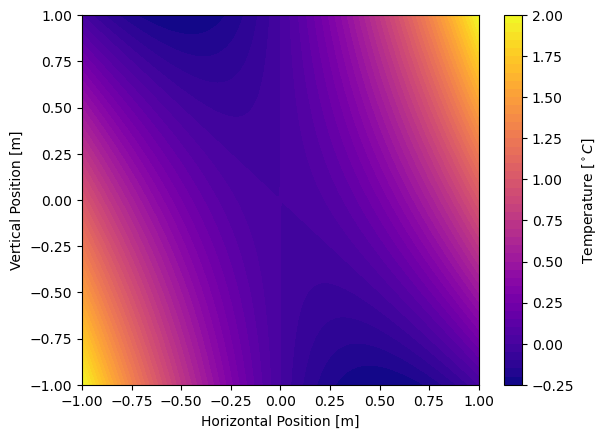

In [19]:
plt.contourf(x,y,z, levels=50, cmap='plasma')
plt.colorbar(label='Temperature [$^\circ C$]')
plt.xlabel('Horizontal Position [m]')
plt.ylabel('Vertical Position [m]')

## Contour Plot only

<a list of 28 text.Text objects>

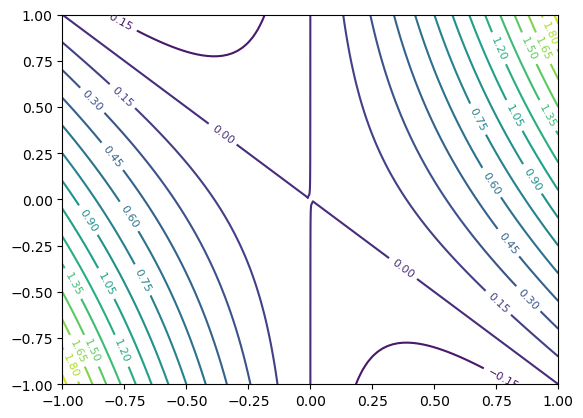

In [20]:
cs = plt.contour(x, y, z, levels=20)
plt.clabel(cs, fontsize=8)

## 3D Surface Plot

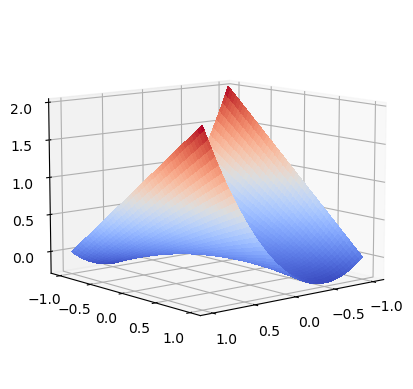

In [21]:
""" 
antialiased: specifies whether to use antialiased rendering.
cmap: sets the colormap for the surface. For example,
"""
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, z, cmap='coolwarm',
                    linewidth=0, antialiased=False)
ax.view_init(elev=10, azim=50)

In [27]:
# Define a new function to plot in 3D
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2)) / np.sqrt(x**2 + y**2)

# Generate some data
x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

print(X.shape)
print(Y.shape)
print(Z.shape)

(200, 200)
(200, 200)
(200, 200)


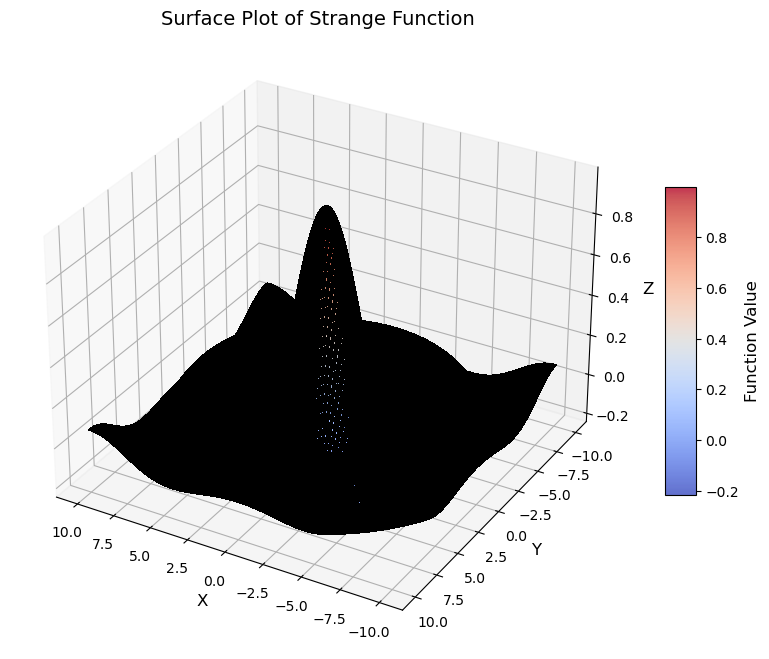

In [29]:
## Define the function to plot
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2)) / np.sqrt(x**2 + y**2)
## Generate some data
x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
# create a meshgrid of x and y arrays and store the resulting X and Y arrays.
X, Y = np.meshgrid(x, y)
# create a meshgrid of x and y arrays and store the resulting X and Y arrays.
Z = f(X, Y)

# Evaluate the f function on the X and Y arrays to generate the Z array of function values.
fig, ax = plt.subplots(figsize=(10,8), subplot_kw={"projection": "3d"})

# Plot the surface (define by X, Y, and Z arrays) with a colormap
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', linewidth=0.5, antialiased=False,
                       alpha=0.8, rstride=1, cstride=1, shade=True, edgecolors='black')

# Set the axis labels and title
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)
ax.set_title('Surface Plot of Strange Function', fontsize=14)

# Set the view angle of the plot
ax.view_init(elev=30, azim=120)

# Add a colorbar for the colormap
cbar = fig.colorbar(surf, shrink=0.5, aspect=10)
cbar.ax.set_ylabel('Function Value', fontsize=12)

# Show the plot
plt.show()

## StreamPlots

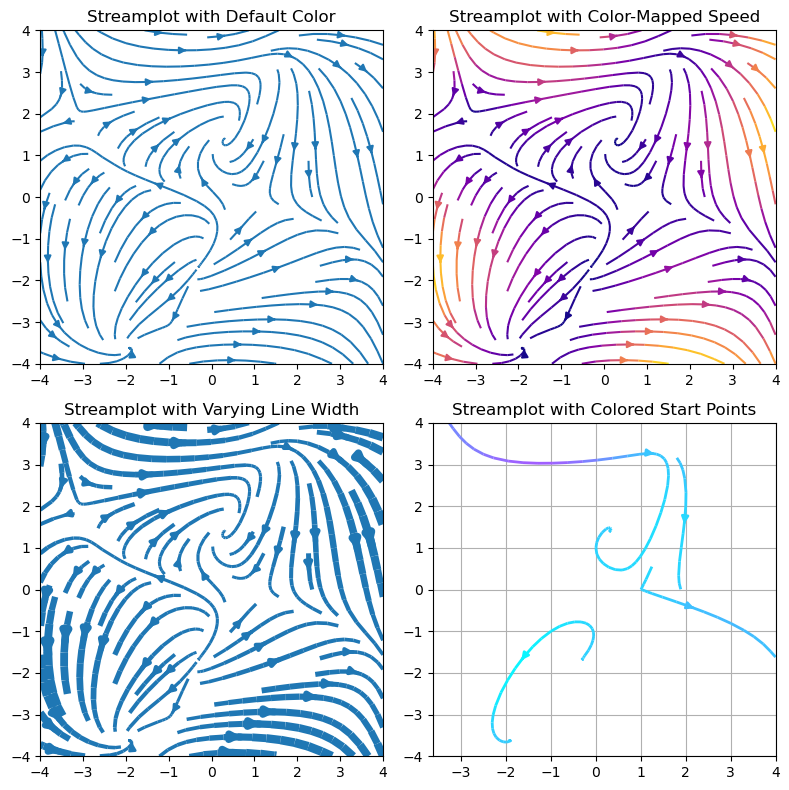

In [24]:
w = 3
_ = np.linspace(-4,4,80)
X, Y = np.meshgrid(_, _)
#U = -1 - X**2 + Y
U = -1 + X + Y**2 - w*Y*np.sin(X)
V = 1 - X**2 - w*X*np.sin(Y)
speed = np.sqrt(U**2 + V**2)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes[0][0]
ax.streamplot(X, Y, U, V, density=0.8)
ax.set_title('Streamplot with Default Color')
ax = axes[0][1]
ax.streamplot(X, Y, U, V, color=speed, cmap='plasma', density=0.8)
ax.set_title('Streamplot with Color-Mapped Speed')
ax = axes[1][0]
lw = 2 + 5*speed / speed.max()
ax.streamplot(X, Y, U, V, linewidth=lw, density=0.8)
ax.set_title('Streamplot with Varying Line Width')
ax = axes[1][1]
seed_points = np.array([[0,1], [1,0], [-1,-1], [2, 2]])
ax.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='cool', start_points=seed_points, density=0.8)
ax.set_title('Streamplot with Colored Start Points')
ax.grid(True)

# Adjust the padding between and around subplots
plt.tight_layout()
#plt.show()

## Open images 

In [33]:
im = plt.imread('./images_matplotlib/panda_image.jpg')
im

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

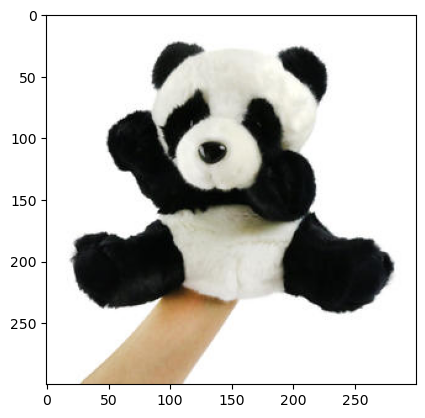

In [34]:
plt.imshow(im)

## Animated graph

In [2]:
def f(x,t):
    return np.sin(x-3*t)

x = np.linspace(0, 10*np.pi, 1000)
t = np.arange(0, 24, 1/60)
X, T = np.meshgrid(x, t)
F = f(X, T)

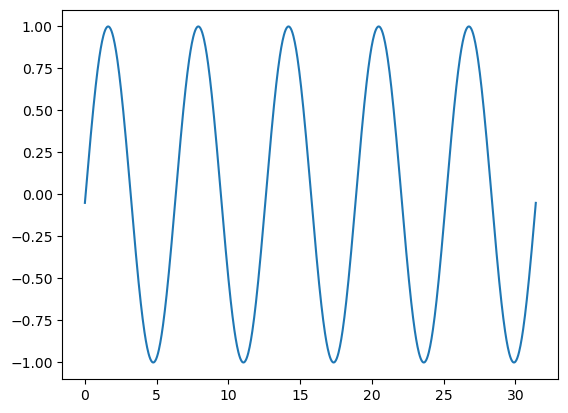

In [3]:
plt.plot(x, F[1])
plt.show()

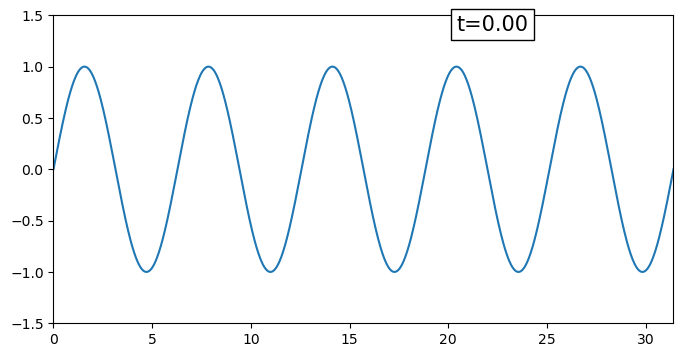

In [4]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
ln1, = plt.plot([], [])
time_text = ax.text(0.65, 0.95, '', fontsize=15,
                    bbox=dict(facecolor='white', edgecolor='black'), 
                    transform=ax.transAxes)
ax.set_xlim(0,10*np.pi)
ax.set_ylim(-1.5, 1.5)

def animate(i):
    ln1.set_data(x, F[i])
    time_text.set_text('t={:.2f}'.format(i/60))
    
ani = animation.FuncAnimation(fig, animate, frames=240, interval=50)
ani.save('./images_matplotlib/animation.gif',writer='pillow',fps=50,dpi=100)

Animation displays behave differently in Jupyter Notebooks compared to standalone Python.           
The animation is not shown in the notebook, only externally.                  
It is necessary to add interactive animations with IPython.display.

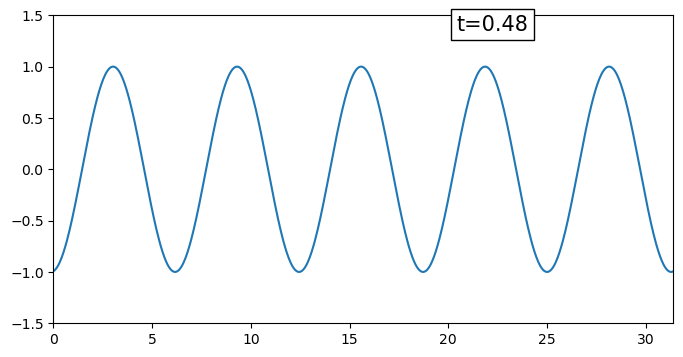

In [2]:
def f(x,t):
    return np.sin(x-3*t)

x = np.linspace(0, 10*np.pi, 1000)
t = np.arange(0, 24, 1/60)
X, T = np.meshgrid(x, t)
F = f(X, T)
fig, ax = plt.subplots(1,1, figsize=(8,4))
ln1, = plt.plot([], [])
time_text = ax.text(0.65, 0.95, '', fontsize=15,
                    bbox=dict(facecolor='white', edgecolor='black'), 
                    transform=ax.transAxes)
ax.set_xlim(0,10*np.pi)
ax.set_ylim(-1.5, 1.5)

# Set the limit for t
t_limit = 0.5
# The animation stops when t reaches the specified limit
for i, current_t in enumerate(t):
    if current_t < t_limit:
        ln1.set_data(x, F[i])
        time_text.set_text('t={:.2f}'.format(current_t))
        
        display(fig)
        clear_output(wait=True)
        time.sleep(0.05)

## 3D rotating gifs of surfaces

In [4]:
""" Generate x and y values using a meshgrid. 
Use placeholder, repeat the same array for both x and y to create the meshgrid.
"""
_ = np.linspace(-1, 1, 100)
x, y = np.meshgrid(_,_)
z = x**2+x*y

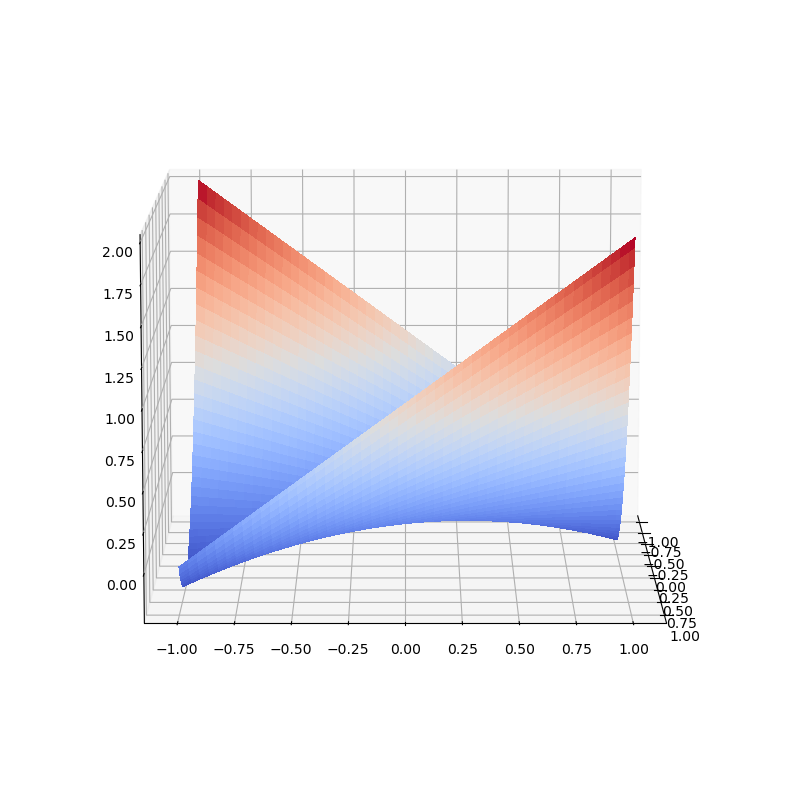

In [6]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(7,7))
# Plot a 3D surface using x, y, and z values
ax.plot_surface(x, y, z, cmap='coolwarm', linewidth=0, antialiased=False)
# Set the initial view angle
ax.view_init(elev=10, azim=0)

def animate(i):
    """ Update the view angle azimuth (rotation around z-axis). """
    ax.view_init(elev=10, azim=3*i) 

## Create an animation 
# The animation will smoothly change the azimuth angle from 0 to 360 over 120 frames
ani = animation.FuncAnimation(fig, animate, frames=120, interval=50)
# Save the animation as a GIF using the Pillow writer
ani.save('./images_matplotlib/animation2.gif',writer='pillow',fps=30,dpi=100)